In [31]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten,Dense,MaxPool2D,Conv2D,Dropout,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
data= np.load("ORL_faces.npz",mmap_mode="r")

In [33]:
lst = data.files
for item in lst:
    print(item)
    print(data[item])

testY
[ 0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14
 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19]
testX
[[ 41.  47.  47. ...  35.  37.  38.]
 [ 44.  43.  32. ...  43.  43.  37.]
 [ 42.  41.  44. ...  42.  43.  41.]
 ...
 [101. 100. 103. ...  31.  40.  42.]
 [105. 108. 106. ...  44.  40.  47.]
 [113. 114. 111. ...  62.  81.  89.]]
trainX
[[ 48.  49.  45. ...  47.  46.  46.]
 [ 60.  60.  62. ...  32.  34.  34.]
 [ 39.  44.  53. ...  29.  26.  29.]
 ...
 [114. 117. 114. ...  98.  96.  98.]
 [105. 105. 107. ...  54.  47.  41.]
 [116. 114. 117. ...  95. 100. 101.]]
trainY
[ 0  0  0  0  0  0  0  0  0  0

In [34]:
faces=data["trainX"]/255.0
faces_test=data["testX"]/255.0

In [35]:
label  =data["trainY"]
label_test = data["testY"]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train ,X_val,y_train,y_test=train_test_split(faces,label,random_state=3)

In [38]:
X_train_trans=X_train.reshape(-1,112,92,1)
X_val=X_val.reshape(-1, 112,92,1)

In [39]:
faces_test=faces_test.reshape(-1,112,92,1)

In [40]:
X_train_trans=X_train_trans.astype("float32")
X_val=X_val.astype("float32")

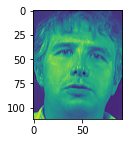

In [41]:
plt.figure(figsize=(2,2))
plt.imshow(X_train_trans[0])

In [11]:
# X_val=np.array(X_val,dtype="float32")
# y_test=np.array(y_test,dtype="float32")


# X_train_trans=np.array(X_train_trans,dtype="float32")
# y_train=np.array(y_train,dtype="float32")

# X_train_trans = X_train_trans.reshape(-1, 112,92,1)


In [97]:
# train_datagen = ImageDataGenerator(
#     preprocessing_function=preprocess_input,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest')

# train_set = train_datagen.flow_from_directory(X_train_trans,
#                                                  target_size = (112,92),
#                                                  batch_size = 32,
#                                                  class_mode = 'categorical')

In [43]:
def build_model(hp):  
    model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter',min_value=32,max_value=256,step=32),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(112,92,1)
    ),
    keras.layers.MaxPool2D(pool_size=hp.Choice("max_pool_1",values=[2,3])
                          ,strides=hp.Choice("stride_2",values=[2, 2]), padding='valid'
    ),
    
    keras.layers.BatchNormalization(),
#     keras.layers.Dropout(hp.choice([0.3,0.5])),
    
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.MaxPool2D(pool_size=hp.Choice("max_pool_2",values=[2,3])
                          ,strides=hp.Choice("stride_2",values=[2]), padding='valid'
    ),
    keras.layers.BatchNormalization(),
        keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.MaxPool2D(pool_size=hp.Choice("max_pool_2",values=[2,3])
                          ,strides=hp.Choice("stride_2",values=[2]), padding='valid'
    ),
    keras.layers.BatchNormalization(),
        keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.MaxPool2D(pool_size=hp.Choice("max_pool_2",values=[2,3])
                          ,strides=hp.Choice("stride_2",values=[2]), padding='valid'
    ),
    keras.layers.BatchNormalization(),
#     keras.layers.Dropout(hp.choice([0.3,0.5])),
                           
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=512, max_value=2048, step=256),
        activation='relu'
    ),
    keras.layers.Dropout(hp.Choice("drop_out1",values=[0.3,0.5])),
        keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=512, max_value=1024, step=256),
        activation='relu'
    ),
    keras.layers.Dropout(hp.Choice("drop_out1",values=[0.3,0.5,0.7])),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=256, max_value=1024, step=256),
        activation='relu'
    ),
    keras.layers.Dropout(hp.Choice("drop_out1",values=[0.3,0.5,0.7])),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=256, max_value=512, step=256),
        activation='relu'),
    keras.layers.Dense(20, activation='softmax')
    ])

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3,1e-4])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    return model

In [44]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [45]:
tuner=RandomSearch(build_model,
                          objective='val_accuracy',
                           executions_per_trial=3,
                          max_trials=8,directory='outputs',project_name="Face_recongition",seed=3)

In [101]:
# import keras_tuner as kt

# tuner = kt.Hyperband(build_model,
#                      objective='val_accuracy',
#                      max_epochs=5,
#                      hyperband_iterations=3,
#                      )

In [102]:
# X_train.shape,y_train.shape

((180, 10304), (180,))

In [46]:
tuner.search(X_train_trans,y_train,epochs=5, validation_data=(X_val, y_test))

Trial 8 Complete [00h 00m 53s]
val_accuracy: 0.07777778059244156

Best val_accuracy So Far: 0.09444444750746091
Total elapsed time: 00h 09m 41s
INFO:tensorflow:Oracle triggered exit


In [27]:
callbacks=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=5,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [48]:
model=tuner.get_best_models(num_models=1)[0]

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 108, 88, 32)       832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 53, 43, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 53, 43, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 39, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 19, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 19, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 15, 64)        1

In [50]:
model.fit(X_train_trans,y_train,epochs=150, validation_data=(X_val, y_test))

Epoch 1/150
6/6 [==============================] - 2s 307ms/step - loss: 0.8357 - accuracy: 0.7778 - val_loss: 2.8817 - val_accuracy: 0.0833
Epoch 2/150
6/6 [==============================] - 2s 283ms/step - loss: 0.4944 - accuracy: 0.8444 - val_loss: 3.9236 - val_accuracy: 0.0500
Epoch 3/150
6/6 [==============================] - 2s 295ms/step - loss: 0.3718 - accuracy: 0.8667 - val_loss: 3.9251 - val_accuracy: 0.0500
Epoch 4/150
6/6 [==============================] - 2s 303ms/step - loss: 0.5088 - accuracy: 0.8500 - val_loss: 6.4556 - val_accuracy: 0.0667
Epoch 5/150
6/6 [==============================] - 2s 290ms/step - loss: 0.3341 - accuracy: 0.9000 - val_loss: 5.5493 - val_accuracy: 0.0500
Epoch 6/150
6/6 [==============================] - 2s 309ms/step - loss: 0.1862 - accuracy: 0.9611 - val_loss: 8.1846 - val_accuracy: 0.0333
Epoch 7/150
6/6 [==============================] - 2s 310ms/step - loss: 0.0658 - accuracy: 0.9833 - val_loss: 4.3075 - val_accuracy: 0.1167
Epoch 8/150
6

Epoch 58/150
6/6 [==============================] - 2s 301ms/step - loss: 3.3732e-05 - accuracy: 1.0000 - val_loss: 12.7319 - val_accuracy: 0.0667
Epoch 59/150
6/6 [==============================] - 2s 291ms/step - loss: 5.9135e-06 - accuracy: 1.0000 - val_loss: 12.6818 - val_accuracy: 0.0667
Epoch 60/150
6/6 [==============================] - 2s 306ms/step - loss: 5.2860e-06 - accuracy: 1.0000 - val_loss: 12.5648 - val_accuracy: 0.0833
Epoch 61/150
6/6 [==============================] - 2s 296ms/step - loss: 6.2170e-06 - accuracy: 1.0000 - val_loss: 12.3986 - val_accuracy: 0.0833
Epoch 62/150
6/6 [==============================] - 2s 296ms/step - loss: 1.5494e-05 - accuracy: 1.0000 - val_loss: 12.2098 - val_accuracy: 0.0833
Epoch 63/150
6/6 [==============================] - 2s 297ms/step - loss: 5.9773e-05 - accuracy: 1.0000 - val_loss: 11.9324 - val_accuracy: 0.0833
Epoch 64/150
6/6 [==============================] - 2s 298ms/step - loss: 1.1302e-05 - accuracy: 1.0000 - val_loss: 11

Epoch 114/150
6/6 [==============================] - 2s 294ms/step - loss: 2.3608e-05 - accuracy: 1.0000 - val_loss: 0.1504 - val_accuracy: 0.9500
Epoch 115/150
6/6 [==============================] - 2s 291ms/step - loss: 4.8907e-06 - accuracy: 1.0000 - val_loss: 0.1334 - val_accuracy: 0.9667
Epoch 116/150
6/6 [==============================] - 2s 295ms/step - loss: 2.4576e-06 - accuracy: 1.0000 - val_loss: 0.1198 - val_accuracy: 0.9667
Epoch 117/150
6/6 [==============================] - 2s 294ms/step - loss: 9.9253e-05 - accuracy: 1.0000 - val_loss: 0.1082 - val_accuracy: 0.9667
Epoch 118/150
6/6 [==============================] - 2s 294ms/step - loss: 3.6063e-06 - accuracy: 1.0000 - val_loss: 0.0966 - val_accuracy: 0.9667
Epoch 119/150
6/6 [==============================] - 2s 292ms/step - loss: 1.9868e-06 - accuracy: 1.0000 - val_loss: 0.0887 - val_accuracy: 0.9667
Epoch 120/150
6/6 [==============================] - 2s 290ms/step - loss: 3.0970e-06 - accuracy: 1.0000 - val_loss: 0

In [55]:
y_loss,y_acc=model.evaluate(faces_test,label_test)

5/5 [==============================] - 0s 57ms/step - loss: 0.8032 - accuracy: 0.8813


In [60]:
pred=model.predict(faces_test)

In [78]:
l1=[]
for i in range(160):
    l1.append(pred[i].argmax())

In [79]:
pred=np.array(l1)

In [58]:
model.save("fac_reg_model.h5")

# so got test accuracy 88%

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [80]:
confusion_matrix(label_test,pred)

array([[8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

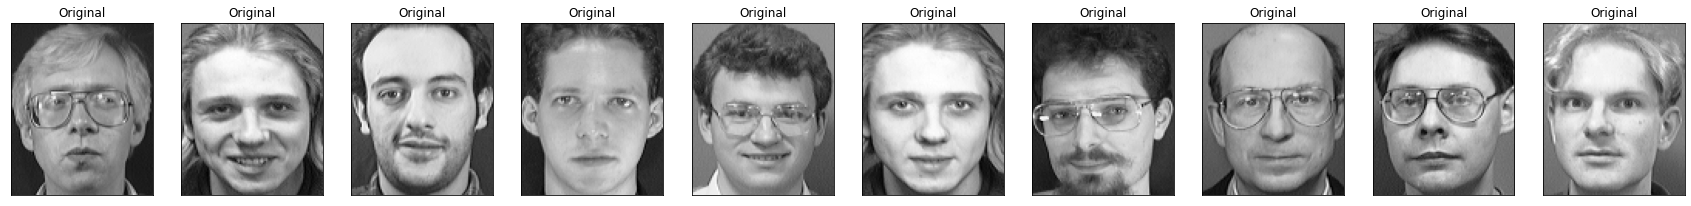

In [81]:
n = 10
plt.figure(figsize=(30, 30))
for i in range(n):
    #display the original images
    ax = plt.subplot(1, n, i+1)
    plt.imshow(X_val[i])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
!pip install face_recognition1

In [ ]:
import cv2
import numpy as np
import face_recognition
import os
from datetime import datetime

# from PIL import ImageGrab

path = 'Training_images'
images = []
classNames = []
myList = os.listdir(path)
print(myList)
for cl in myList:
    curImg = cv2.imread(f'{path}/{cl}')
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])
print(classNames)


def findEncodings(images):
    encodeList = []


    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(img)[0]
        encodeList.append(encode)
    return encodeList


def markAttendance(name):
    with open('Attendance.csv', 'r+') as f:
        myDataList = f.readlines()


        nameList = []
        for line in myDataList:
            entry = line.split(',')
            nameList.append(entry[0])
            if name not in nameList:
                now = datetime.now()
                dtString = now.strftime('%H:%M:%S')
                f.writelines(f'\n{name},{dtString}')

#### FOR CAPTURING SCREEN RATHER THAN WEBCAM
# def captureScreen(bbox=(300,300,690+300,530+300)):
#     capScr = np.array(ImageGrab.grab(bbox))
#     capScr = cv2.cvtColor(capScr, cv2.COLOR_RGB2BGR)
#     return capScr

encodeListKnown = findEncodings(images)
print('Encoding Complete')

cap = cv2.VideoCapture(0)

while True:
    success, img = cap.read()
# img = captureScreen()
    imgS = cv2.resize(img, (0, 0), None, 0.25, 0.25)
    imgS = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)

    facesCurFrame = face_recognition.face_locations(imgS)
    encodesCurFrame = face_recognition.face_encodings(imgS, facesCurFrame)

    for encodeFace, faceLoc in zip(encodesCurFrame, facesCurFrame):
        matches = face_recognition.compare_faces(encodeListKnown, encodeFace)
        faceDis = face_recognition.face_distance(encodeListKnown, encodeFace)
# print(faceDis)
        matchIndex = np.argmin(faceDis)

        if matches[matchIndex]:
            name = classNames[matchIndex].upper()
# print(name)
            y1, x2, y2, x1 = faceLoc
            y1, x2, y2, x1 = y1 * 4, x2 * 4, y2 * 4, x1 * 4
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.rectangle(img, (x1, y2 - 35), (x2, y2), (0, 255, 0), cv2.FILLED)
            cv2.putText(img, name, (x1 + 6, y2 - 6), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)
            markAttendance(name)

    cv2.imshow('Webcam', img)
    cv2.waitKey(1)

